<a href="https://colab.research.google.com/github/DeepLearningSaeid/New-Type-of-Deep-Learning/blob/master/SWAG_EXP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding, LSTM, Dense,concatenate,  Dropout, Flatten, Conv2D, MaxPool2D, Activation,MaxPooling2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
############################################################################
numpy.random.seed(110)

In [2]:
#Defining New Activation functions
############################################################################
def X_1(x):
    return (K.pow(x,1))
get_custom_objects().update({'X_1': Activation(X_1)})
############################################################################
def X_2(x):
    return (K.pow(x,2))/2
get_custom_objects().update({'X_2': Activation(X_2)})
############################################################################
def X_3(x):
    return (K.pow(x,3))/6
get_custom_objects().update({'X_3': Activation(X_3)})
############################################################################
def X_4(x):
    return (K.pow(x,4))/24
get_custom_objects().update({'X_4': Activation(X_4)})
############################################################################
def X_5(x):
    return (K.pow(x,5))/120
get_custom_objects().update({'X_5': Activation(X_5)})
###############################################################################
def X_6(x):
    return (K.pow(x,6))/720
get_custom_objects().update({'X_6': Activation(X_6)})
############################################################################
def X_7(x):
    return (K.pow(x,7))/5040
get_custom_objects().update({'X_7': Activation(X_7)})
############################################################################
def X_8(x):
    return (K.pow(x,8))/40320
get_custom_objects().update({'X_8': Activation(X_8)})
###############################################################################
def X_9(x):
    return (K.pow(x,8))/362880
get_custom_objects().update({'X_9': Activation(X_9)})
###############################################################################


In [3]:
#Define Test Functions

def power_(x,n):                                        
    return  np.power(x, n)
###############################################################################
def sigmoid_array(x):                                        
    return 1 / (1 + np.exp(-x))
###############################################################################
def exp_(x):                                        
    return  np.exp(x)
###############################################################################
def log_(x):                                        
    return  np.log(x)
###############################################################################
def generate_random( shape_1,shape_2):
    temp= np.random.random(shape_1*shape_2)
    temp1=temp.reshape(shape_1,shape_2)
    return temp1
###############################################################################
def fun_1(x):
    return 1/2*power_(x, 2)-5*sigmoid_array(x)
###############################################################################
def fun_2(x):
    return 6*power_(x, 5)-3*sigmoid_array(x)+exp_(x)-9*log_(x)
###############################################################################
def fun_3(x):
    return 22*power_(x, 20)+sigmoid_array(x)+2*exp_(x)+5*log_(x)
###############################################################################


In [4]:
#Creates plots for all test functions
def plot_loss(size,in_1,in_2,in_3,in_4,in_5,in_6):

    plt.rcParams.update({'font.size': 16})

    plt.figure(figsize=(20,10))
    plt.subplot(231)
    training_loss1 = in_1.history['loss']
    test_loss1 = in_1.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 1')


    plt.subplot(232)
    training_loss1 = in_2.history['loss']
    test_loss1 = in_2.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 2')



    plt.subplot(233)
    training_loss1 = in_3.history['loss']
    test_loss1 = in_3.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 3')



    plt.subplot(234)
    training_loss1 = in_4.history['loss']
    test_loss1 = in_4.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 4')
    
    

    plt.subplot(235)
    training_loss1 = in_5.history['loss']
    test_loss1 = in_5.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 5')

    
    
    plt.subplot(236)
    training_loss1 = in_6.history['loss']
    test_loss1 = in_6.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Our Architure ')



    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.3,
                        wspace=0.18)

    plt.show()

In [5]:
#Create plots for shape of test function
def plot_shape(in_1,in_2,in_3,in_4,in_5,in_6):

    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 16})

    plt.subplot(231)
    plt.scatter(in_1[0], in_1[1])
    plt.scatter(in_1[0], in_1[2])
    plt.title('Architure 1')


    plt.subplot(232)
    plt.scatter(in_2[0], in_2[1])
    plt.scatter(in_2[0], in_2[2])
    plt.title('Architure 2')


    plt.subplot(233)
    plt.scatter(in_3[0], in_3[1])
    plt.scatter(in_3[0], in_3[2])
    plt.title('Architure 3')


    plt.subplot(234)
    plt.scatter(in_4[0], in_4[1])
    plt.scatter(in_4[0], in_4[2])
    plt.title('Architure 4')
    
    plt.subplot(235)
    plt.scatter(in_5[0], in_5[1])
    plt.scatter(in_5[0], in_5[2])
    plt.title('Architure 5')    
    
    plt.subplot(236)
    plt.scatter(in_6[0], in_6[1])
    plt.scatter(in_6[0], in_6[2])
    plt.title('Our Architure')


    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.3,
                        wspace=0.18)

    plt.show()


In [6]:
#Creates dataset
dim_train=100
dim_test=100

X_train_temp=generate_random(dim_train,1)
Y_train_temp=generate_random(dim_train,3)

X_test_temp=generate_random(dim_test,1)
Y_test_temp=generate_random(dim_test,3)


for i in range(dim_test-1):
    X_test_temp[i,0]=(i+1)*0.01
    X_train_temp[i,0]=(i+1)*0.01 +0.005  
    

    
Y_train_temp[:,0]=fun_1(X_train_temp[:,0])
Y_train_temp[:,1]=fun_2(X_train_temp[:,0])
Y_train_temp[:,2]=fun_3(X_train_temp[:,0])
    

Y_test_temp[:,0]=fun_1(X_test_temp[:,0])
Y_test_temp[:,1]=fun_2(X_test_temp[:,0])
Y_test_temp[:,2]=fun_3(X_test_temp[:,0])

In [7]:
#Hyper perameters
number_epo=50
input_dim=1
output_dim=1

In [8]:
#First Standard Archetecture
model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(output_dim, activation='tanh'))
model.add(Dropout(0.2))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
#Creates plot for loss and trainning functions
def plot_(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();

Run Time : 8.308883


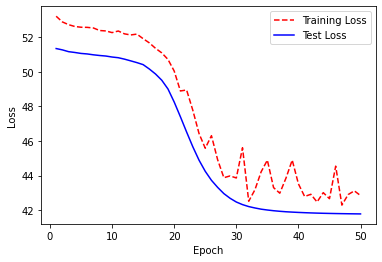

4/4 [==============================] - 0s 4ms/step


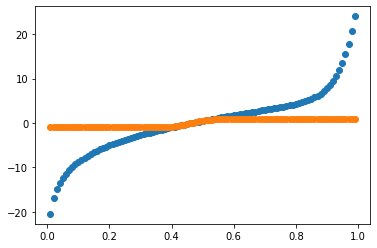

In [10]:
#train traditional model for Function 3
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]
# F_3_archicture_1_


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_1=[X_test,Y_test,predict,history,]

Run Time : 6.239380


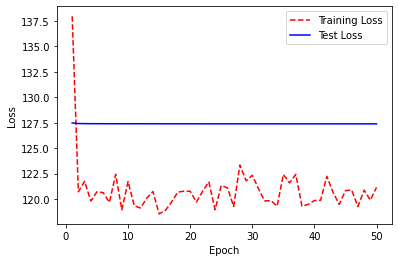

4/4 [==============================] - 0s 5ms/step


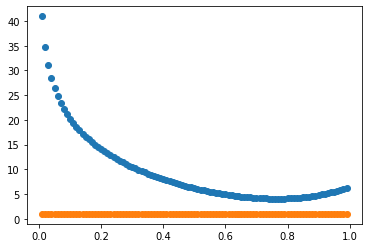

In [11]:
#Train model for Funtcion 2 
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]

#F_2_archicture_1

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)


F_2_archicture_1=[X_test,Y_test,predict,history]

Run Time : 5.186945


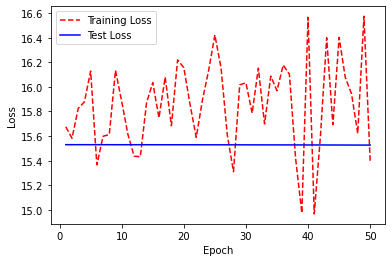

4/4 [==============================] - 0s 6ms/step


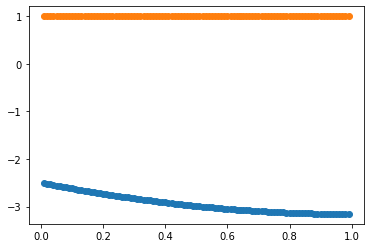

In [12]:
#Train Model for function 1
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]

#F_1_archicture_1

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_archicture_1=[X_test,Y_test,predict,history]

In [13]:
#Second Traditional model for Function 3
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(18, activation='relu'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(18, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 5.774243


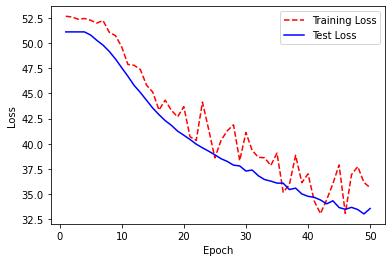

4/4 [==============================] - 0s 3ms/step


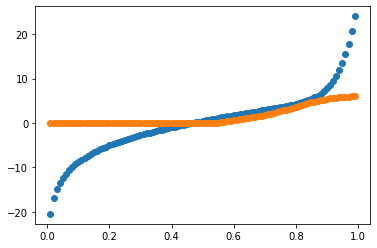

In [14]:
#Train MOdel for Function 3
archicture_2=[]
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_3_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_2=[X_test,Y_test,predict,history]


Run Time : 2.604591


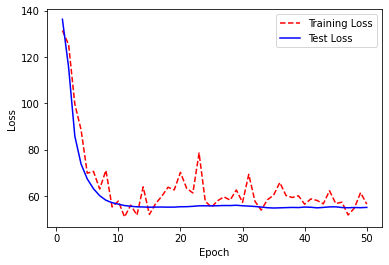

4/4 [==============================] - 0s 2ms/step


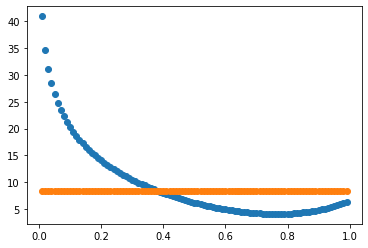

In [15]:
#Train MOdel for Function 2
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_2_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)
F_2_archicture_2=[X_test,Y_test,predict,history]


Run Time : 2.599204


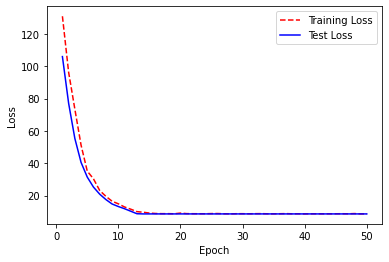

4/4 [==============================] - 0s 3ms/step


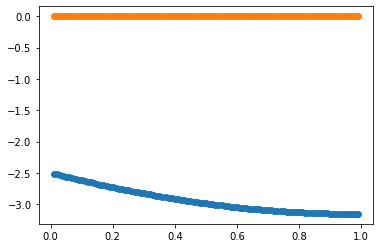

In [16]:
#Train MOdel for Function 1
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_1_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_archicture_2=[X_test,Y_test,predict,history]


In [17]:
#Third Traditional Model 
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 10        
                                                                 
 dense_17 (Dense)            (None, 10)                60        
                                                                 
 dense_18 (Dense)            (None, 20)                220       
                                                                 
 dense_19 (Dense)            (None, 15)                315       
                                                                 
 dense_20 (Dense)            (None, 25)                400       
                                                                 
 dense_21 (Dense)            (None, 20)                520       
                                                                 
 dense_22 (Dense)            (None, 25)               

Run Time : 3.679624


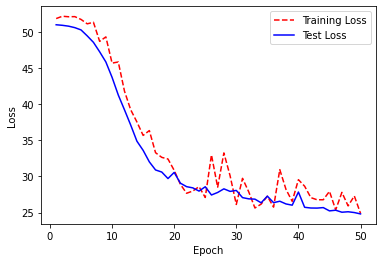

4/4 [==============================] - 0s 3ms/step


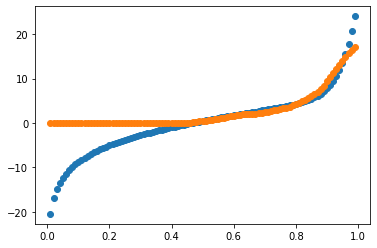

In [18]:
#Train Model for Function 3
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_3_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_3=[X_test,Y_test,predict,history]


Run Time : 5.149890


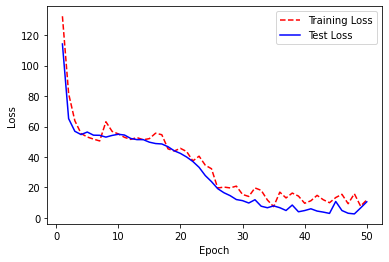

4/4 [==============================] - 0s 3ms/step


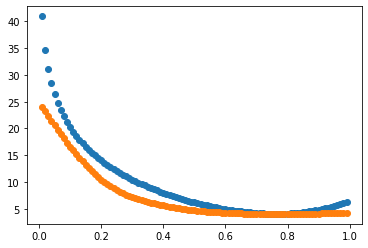

In [19]:
#Train Model for Function 2
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_2_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)
F_2_archicture_3=[X_test,Y_test,predict,history]


Run Time : 5.156120


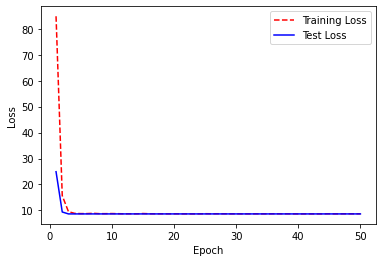

4/4 [==============================] - 0s 3ms/step


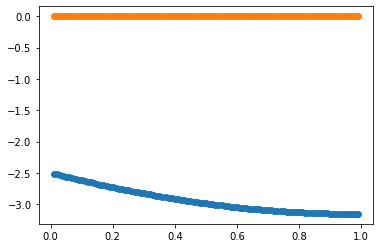

In [20]:
#Train Model for Function 1
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_1_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)


F_1_archicture_3=[X_test,Y_test,predict,history]


In [21]:
#Fourth Traditional Model
model = Sequential()
model.add(Dense(40, input_dim=input_dim, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
model.add(Dropout(0.2))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 2.991398


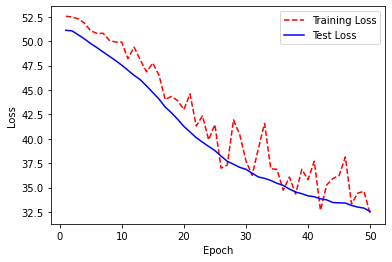

4/4 [==============================] - 0s 3ms/step


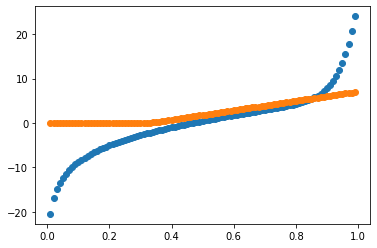

In [22]:
#Train Model for Function 3
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_3_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_4=[X_test,Y_test,predict,history]


Run Time : 2.588542


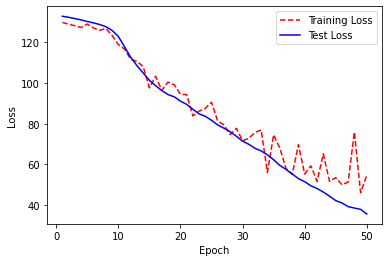

4/4 [==============================] - 0s 3ms/step


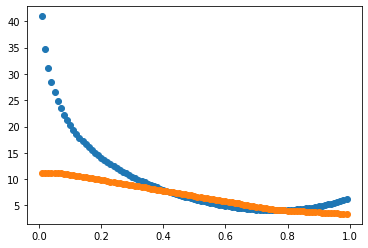

In [23]:
#Train Model for Function 2
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_2_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_2_archicture_4=[X_test,Y_test,predict,history]


Run Time : 2.400132


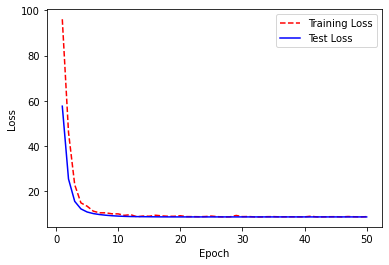

4/4 [==============================] - 0s 3ms/step


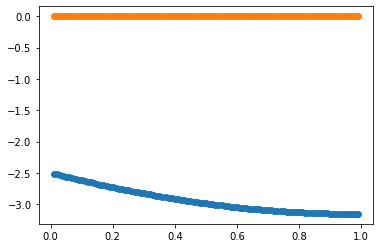

In [24]:
#Train Model for Function 1
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_1_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_archicture_4=[X_test,Y_test,predict,history]


In [25]:
#Fifth Traditional Model
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='softplus'))
model.add(Dense(10, activation='softplus'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(output_dim, activation='softplus'))
model.add(Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 5.730719


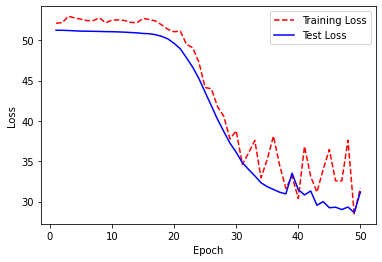

4/4 [==============================] - 0s 3ms/step


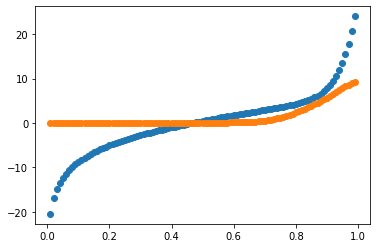

In [26]:
#Train Model for Function 3
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_3_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)


F_3_archicture_5=[X_test,Y_test,predict,history]


Run Time : 2.604314


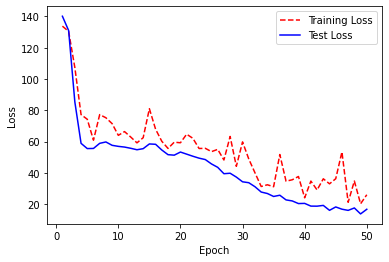

4/4 [==============================] - 0s 4ms/step


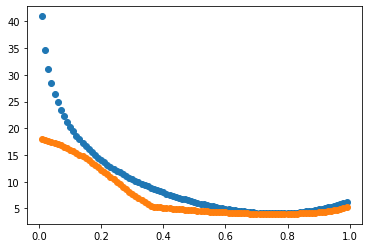

In [27]:
#Train Model for Function 2
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_2_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_2_archicture_5=[X_test,Y_test,predict,history]


Run Time : 2.467661


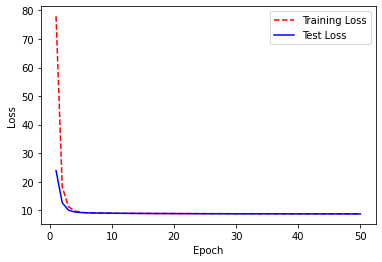

4/4 [==============================] - 0s 6ms/step


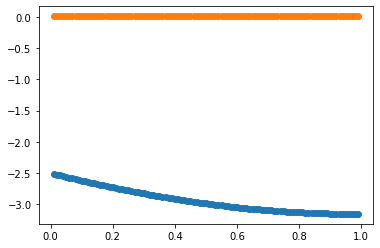

In [28]:
#Train Model for Function 1
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_1_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_archicture_5=[X_test,Y_test,predict,history]


In [29]:
#Number of neurons in each polynomial layer
hidden_dimention=50

In [30]:
#Create SWAG Model with 4 Layers
model = Sequential()

in_ = Input(shape=(input_dim,))
Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention, activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention, activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention, activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention, activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention, activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put_first_layer=Dense(hidden_dimention, activation='linear')(Concatenate_First_Layer)

###############################################################
Layer_2_Act_X_1=Dense(hidden_dimention, activation='X_1')(Out_put_first_layer)
################################################################
Layer_2_Act_X_2=Dense(hidden_dimention, activation='X_2')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_3=Dense(hidden_dimention, activation='X_3')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_4=Dense(hidden_dimention, activation='X_4')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_5=Dense(hidden_dimention, activation='X_5')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_6=Dense(hidden_dimention, activation='X_6')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_7=Dense(hidden_dimention, activation='X_7')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_8=Dense(hidden_dimention, activation='X_8')(Out_put_first_layer)
###############################################################


Concatenate_second_Layer = concatenate([Layer_2_Act_X_1,Layer_2_Act_X_2,Layer_2_Act_X_3,Layer_2_Act_X_4,Layer_2_Act_X_5,Layer_2_Act_X_6,Layer_2_Act_X_7,Layer_2_Act_X_8])

Out_put=Dense(output_dim, activation='linear')(Concatenate_second_Layer)
model = Model(in_ , Out_put)
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_37 (Dense)               (None, 50)           100         ['input_1[0][0]']                
                                                                                                  
 dense_38 (Dense)               (None, 50)           100         ['input_1[0][0]']                
                                                                                                  
 dense_39 (Dense)               (None, 50)           100         ['input_1[0][0]']                
                                                                                              

In [32]:
# from IPython.display import Image
# Image(filename='model_4_layers.png')

Run Time : 5.097662


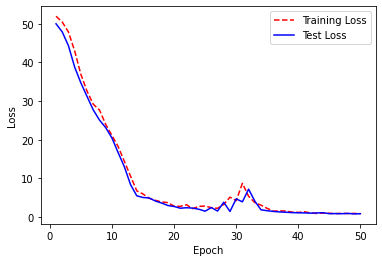

4/4 [==============================] - 0s 8ms/step


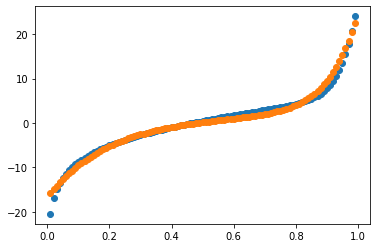

In [33]:
#Train Our Model on Function 3
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_3_archicture_Our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_our_model=[X_test,Y_test,predict,history]



Run Time : 5.150390


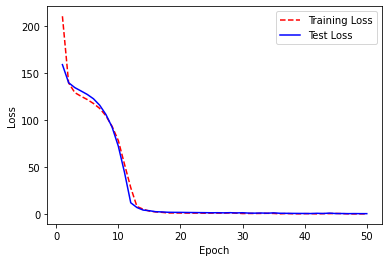

4/4 [==============================] - 0s 5ms/step


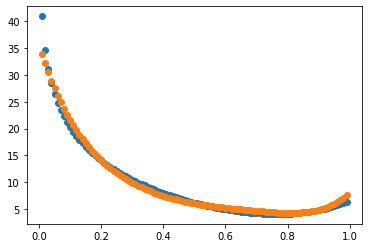

In [34]:
#Train Our Model on Function 2
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_2_archicture_Our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_2_our_model=[X_test,Y_test,predict,history]

Run Time : 10.339250


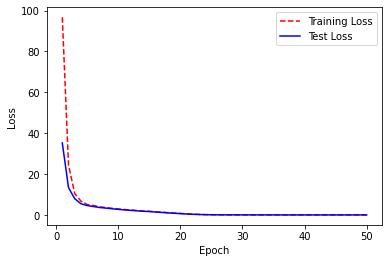

4/4 [==============================] - 0s 4ms/step


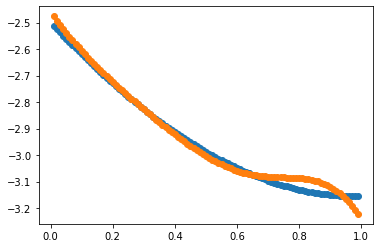

In [35]:
#Train Our Model on Function 1
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_2_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_our_model=[X_test,Y_test,predict,history]

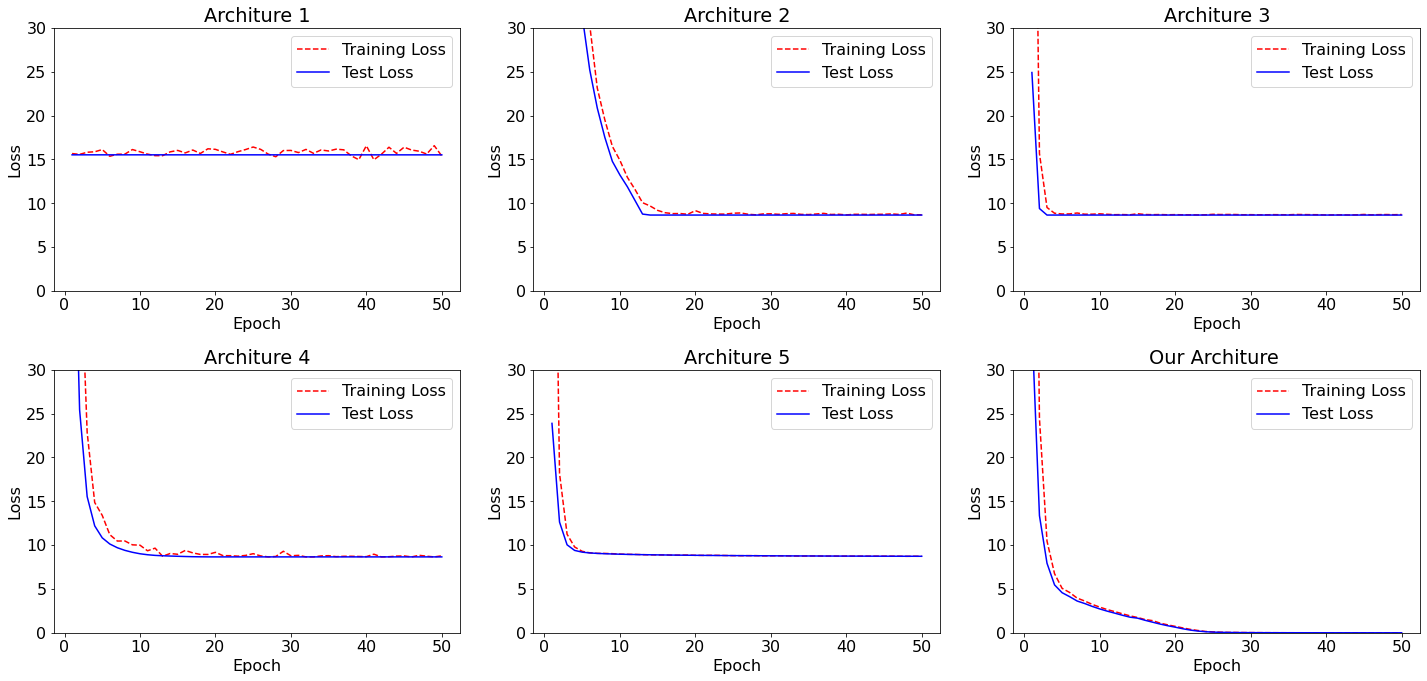

In [36]:
#Plots Losses
plot_loss(30,F_1_archicture_1[3],F_1_archicture_2[3],F_1_archicture_3[3],F_1_archicture_4[3],F_1_archicture_5[3],F_1_our_model[3],)

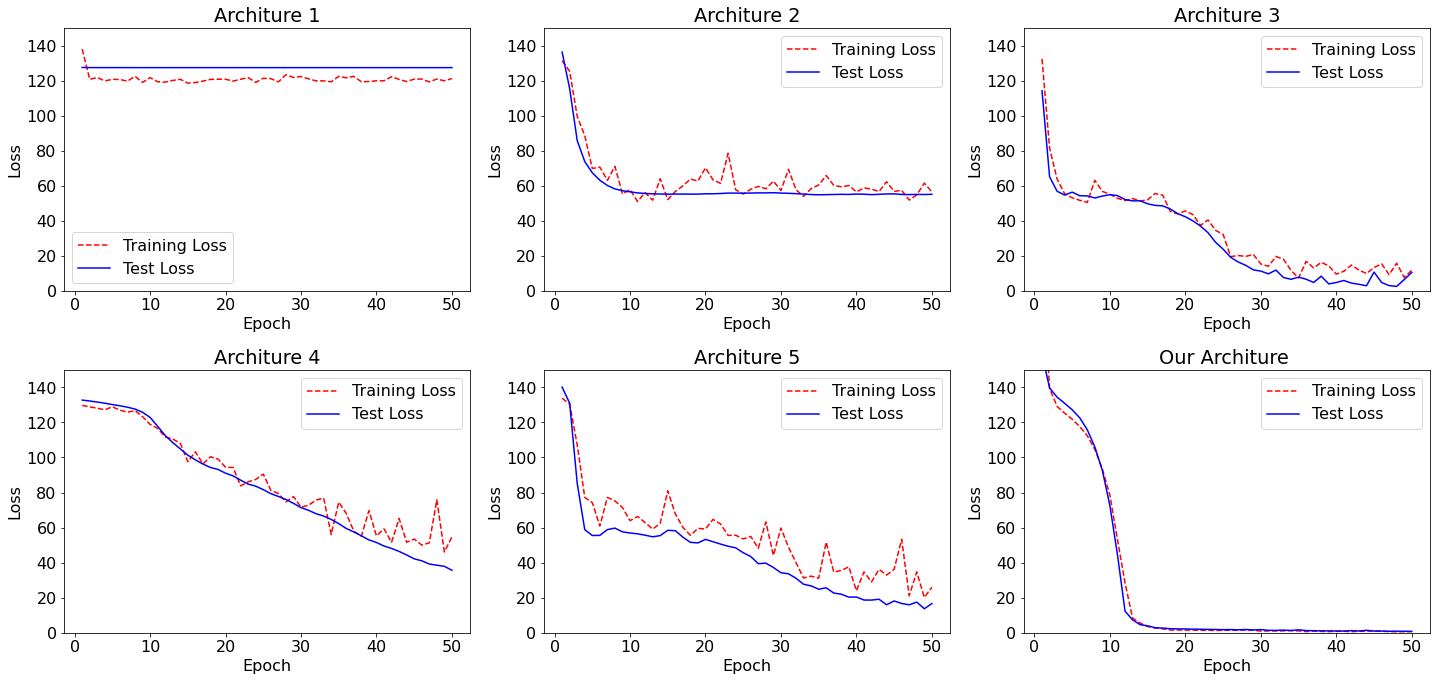

In [37]:
#Plot Losses
plot_loss(150,F_2_archicture_1[3],F_2_archicture_2[3],F_2_archicture_3[3],F_2_archicture_4[3],F_2_archicture_5[3],F_2_our_model[3],)

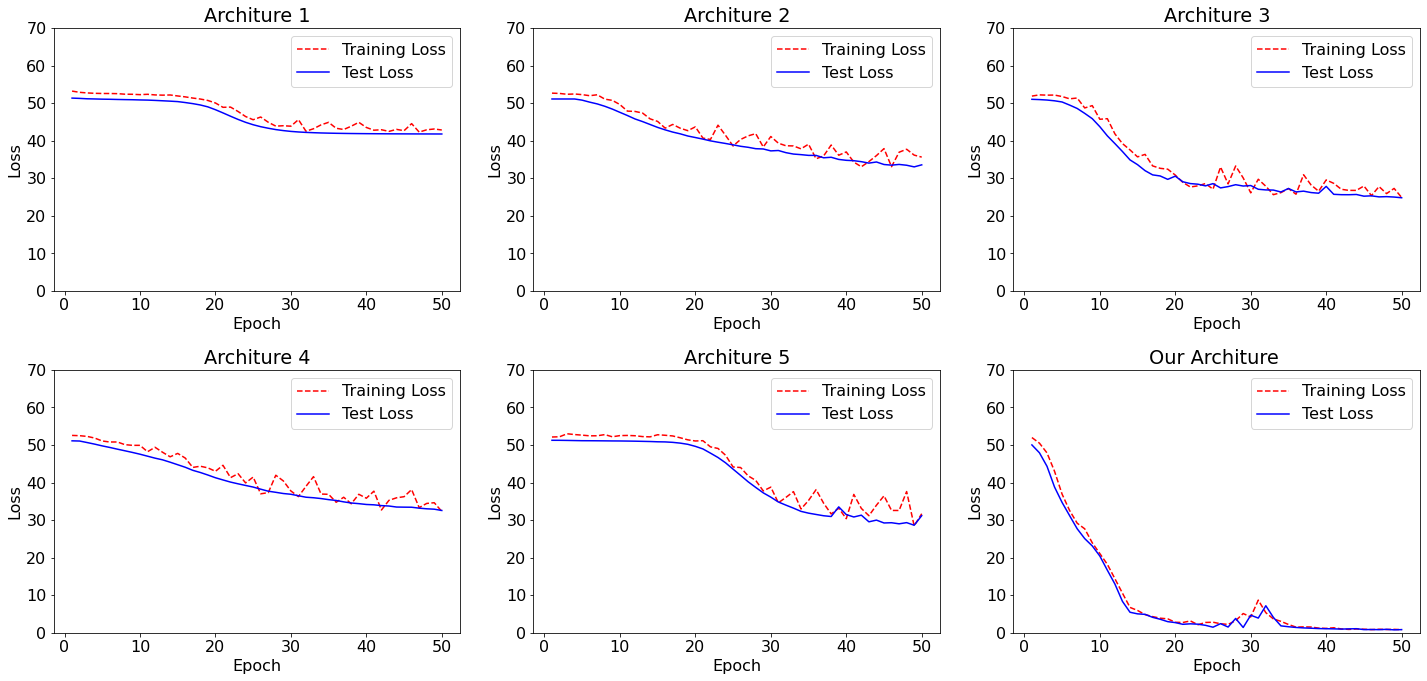

In [38]:
#Plot Losses
plot_loss(70,F_3_archicture_1[3],F_3_archicture_2[3],F_3_archicture_3[3],F_3_archicture_4[3],F_3_archicture_5[3],F_3_our_model[3],)

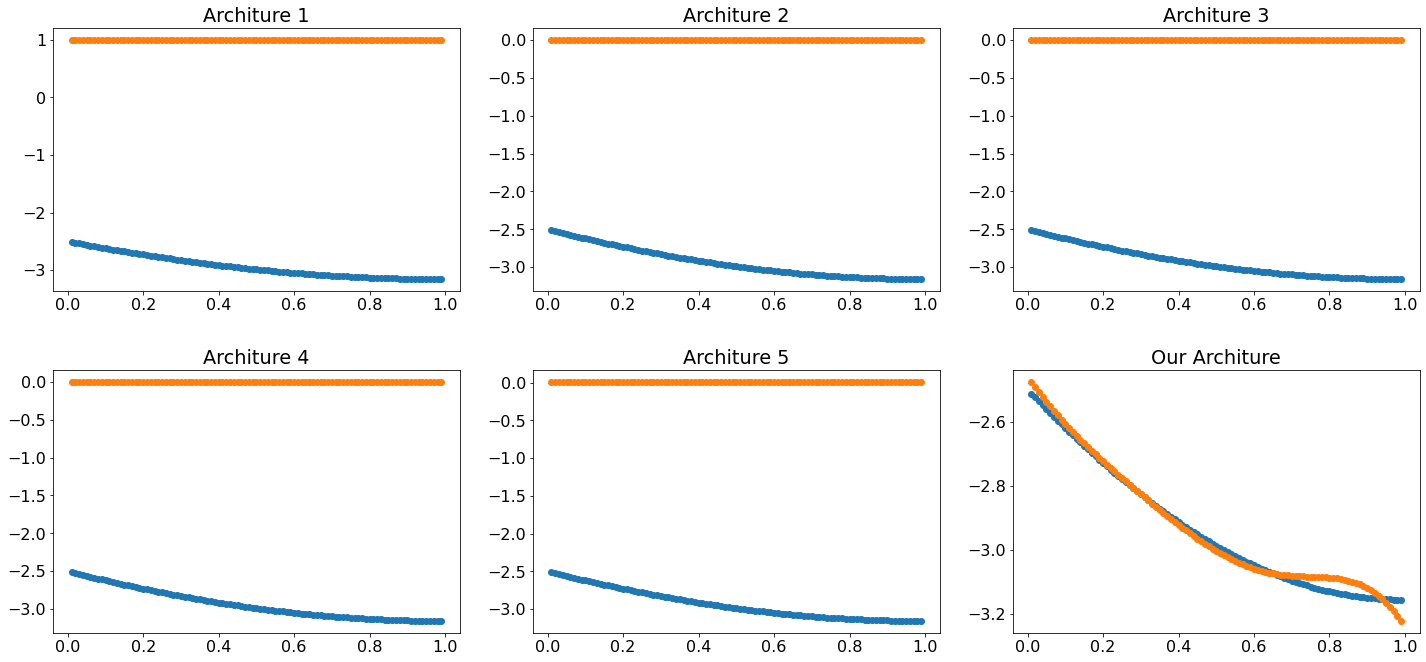

In [39]:
#Plots Shapes
plot_shape(F_1_archicture_1,F_1_archicture_2,F_1_archicture_3,F_1_archicture_4,F_1_archicture_5,F_1_our_model,)


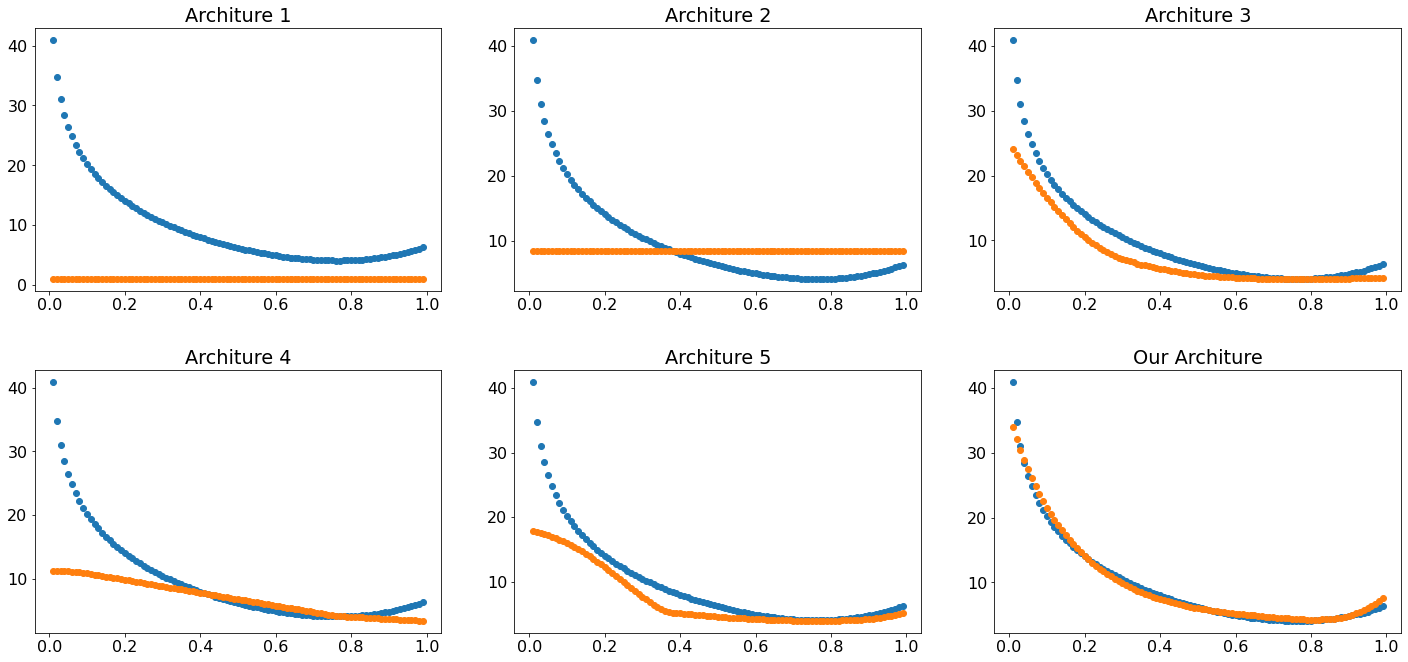

In [40]:
#Plots Shapes 
plot_shape(F_2_archicture_1,F_2_archicture_2,F_2_archicture_3,F_2_archicture_4,F_2_archicture_5,F_2_our_model,)

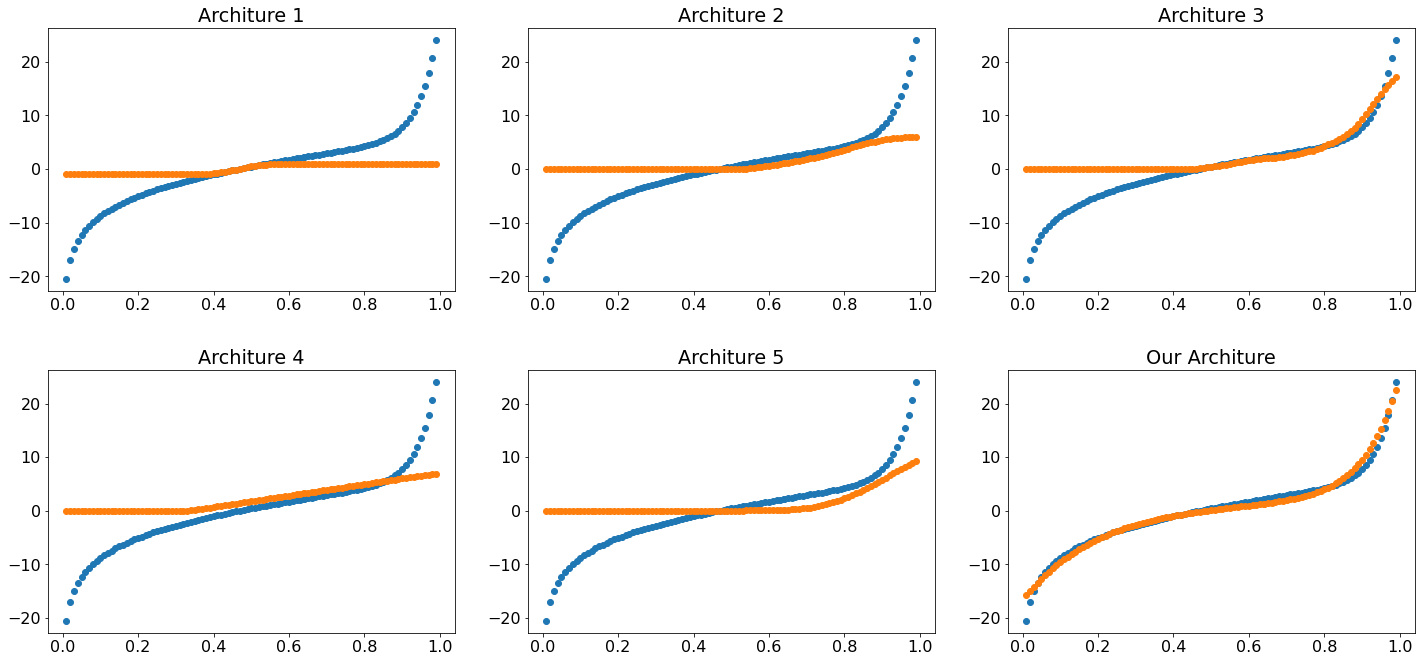

In [41]:
#Plots Shapes
plot_shape(F_3_archicture_1,F_3_archicture_2,F_3_archicture_3,F_3_archicture_4,F_3_archicture_5,F_3_our_model)

In [42]:
#Our Model With 2 Layers
model = Sequential()



in_ = Input(shape=(input_dim,))
Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention, activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention, activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention, activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention, activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention, activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put_first_layer=Dense(hidden_dimention, activation='linear')(Concatenate_First_Layer)


Out_put=Dense(output_dim, activation='linear')(Out_put_first_layer)
model = Model(in_ , Out_put)
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_55 (Dense)               (None, 50)           100         ['input_2[0][0]']                
                                                                                                  
 dense_56 (Dense)               (None, 50)           100         ['input_2[0][0]']                
                                                                                                  
 dense_57 (Dense)               (None, 50)           100         ['input_2[0][0]']                
                                                                                            

In [43]:
# from IPython.display import Image
# Image(filename='model_2_layers.png')

Run Time : 6.500262


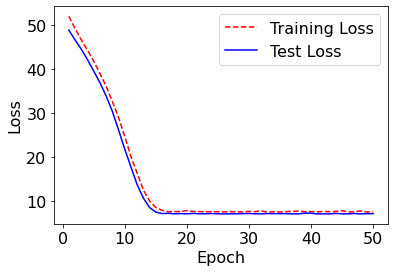

4/4 [==============================] - 0s 3ms/step


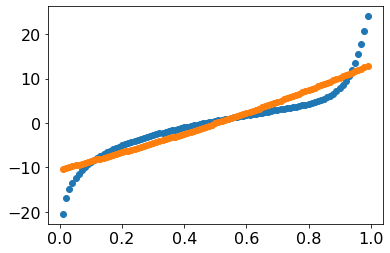

In [44]:
#Train Our Model on Function 3
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_3_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_our_model=[X_test,Y_test,predict,history]



Run Time : 5.171429


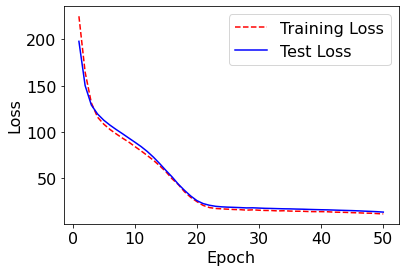

4/4 [==============================] - 0s 4ms/step


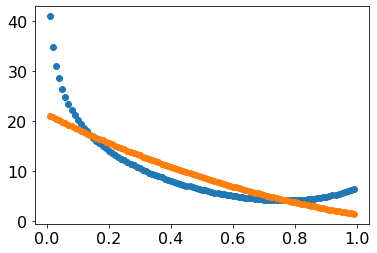

In [45]:
#Train Our Model on Function 2
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_2_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_2_our_model=[X_test,Y_test,predict,history]

Run Time : 5.168861


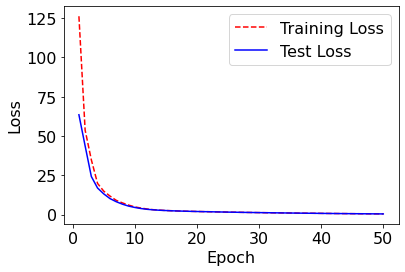

4/4 [==============================] - 0s 3ms/step


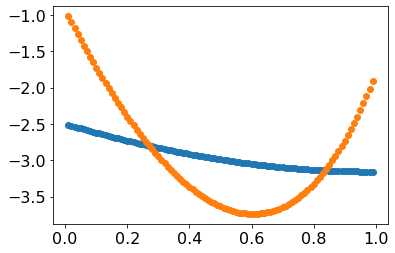

In [46]:
#Train Our Model on Function 1
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#F_1_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_our_model=[X_test,Y_test,predict,history]